In [1]:
import pandas as pd
import re
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
RE_SPACE = re.compile(r'[\s]+')

In [3]:
def preprocess(test_name):
    path = "../test_data/"+test_name
    df = pd.read_csv(path+"/" + test_name + "_stats_history.csv")
    columns = ['Timestamp', 'Name', 'Requests/s', 'Total Average Response Time']
    df = df[columns]
    df = df[df['Total Average Response Time'] >0]
    df = df[df['Name'] != "Aggregated"]
    df['Timestamp'] = df['Timestamp']-df['Timestamp'].iloc[0]
    df.set_index('Timestamp', inplace=True)
    
    groupd = df.groupby('Name')
    diff = groupd.get_group('/ping')['Total Average Response Time']
    
    d_native = groupd.get_group('/actions/fib_cn/invoke').copy()
    d_c = groupd.get_group('/actions/fib_c/invoke').copy()
    
    d_c['Requests/s'] = d_c['Requests/s']*2/5 + d_native['Requests/s']*2/5
    
    d_native['Total Average Response Time'] = d_native['Total Average Response Time']-diff
    d_c['Total Average Response Time'] = d_c['Total Average Response Time']-diff
    
    d_native = d_native[d_native['Total Average Response Time'] >0]
    d_c = d_c[d_c['Total Average Response Time'] >0]
    
    d_native.dropna(inplace=True)
    d_c.dropna(inplace=True)
    
    return d_native, d_c

In [4]:
test = "test7"

In [5]:
title = 'Small workload, dual wave'

In [6]:
d_native, d_c = preprocess(test)

In [7]:
d_c

,Name,Requests/s,Total Average Response Time
Timestamp,,,
1,/actions/fib_c/invoke,0.000000,1.081238
2,/actions/fib_c/invoke,2.800000,6.163124
3,/actions/fib_c/invoke,4.400000,7.305768
4,/actions/fib_c/invoke,4.933333,6.484677
5,/actions/fib_c/invoke,5.100000,9.697268
...,...,...,...
298,/actions/fib_c/invoke,5.800000,28.972155
299,/actions/fib_c/invoke,5.960000,28.936351
300,/actions/fib_c/invoke,5.960000,28.936351


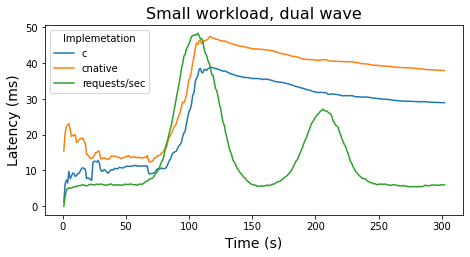

In [8]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
axs = plt.plot(d_c['Total Average Response Time'], label='c')
axs = plt.plot(d_native['Total Average Response Time'], label='cnative')
axs = plt.plot(d_c['Requests/s'], label='requests/sec')

plt.legend(title='Implemetation')

#add axes labels and a title
plt.ylabel('Latency (ms)', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.title(title, fontsize=16)
plt.savefig('./data/' + title + '1.png', dpi=300)
# plt.ylim([0, 8500])
#display plot
plt.show()

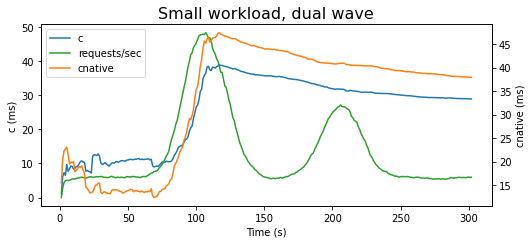

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# df.A.plot(color='red', label='Count')
# ax2 = df.B.plot(color='yellow', secondary_y=True, label='Sum')

ax1 = d_c['Total Average Response Time'].plot(label='c')
ax2 = d_native['Total Average Response Time'].plot(secondary_y=True, label='cnative')
ax1 = d_c['Requests/s'].plot(label='requests/sec')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.set_ylabel(ylabel='c (ms)')
ax2.set_ylabel(ylabel='cnative (ms)')
ax1.set_xlabel(xlabel='Time (s)')

plt.title(title, fontsize=16)
plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig('./data/' + title + '2.png', dpi=300)
plt.show()

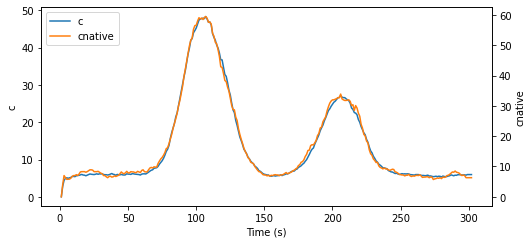

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# df.A.plot(color='red', label='Count')
# ax2 = df.B.plot(color='yellow', secondary_y=True, label='Sum')

ax1 = d_c['Requests/s'].plot(label='c')
ax2 = d_native['Requests/s'].plot(secondary_y=True, label='cnative')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.set_ylabel(ylabel='c')
ax2.set_ylabel(ylabel='cnative')
ax1.set_xlabel(xlabel='Time (s)')

plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig('./data/' + title + '3.png', dpi=300)

plt.show()